In [1]:
import matplotlib
from matplotlib import font_manager, rc
import platform
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
### 한글
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [4]:
from mglearn.datasets import make_blobs 
X, y = make_blobs(n_samples=(400, 50), 
                  centers=2, cluster_std=[7.0, 2],        
                  random_state=22)
                     
print(X.shape, y.shape)

(450, 2) (450,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)   
tree = DecisionTreeClassifier().fit(X_train, y_train)

In [6]:
# SVM 모델
pred = svc.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [7]:
# 의사결정 트리 모델
pred = tree.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       104
           1       0.35      0.78      0.48         9

    accuracy                           0.87       113
   macro avg       0.66      0.83      0.70       113
weighted avg       0.93      0.87      0.89       113



In [9]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
                                            svc.decision_function(X_test))

In [10]:
# 부드러운 곡선을 위해 데이터 포인트 수를 늘립니다
X, y = make_blobs(n_samples=(4000, 500), 
                  centers=2, 
                  cluster_std=[7.0, 2],
                  random_state=22)

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(4500, 2) (4500,)


In [11]:
svc = SVC(gamma=.05).fit(X_train, y_train)
pred = svc.decision_function(X_test)  #  0의 값을 기준으로 분포
precision, recall, thresholds = precision_recall_curve(y_test, pred)

임계값 :  0.0 1.0
0


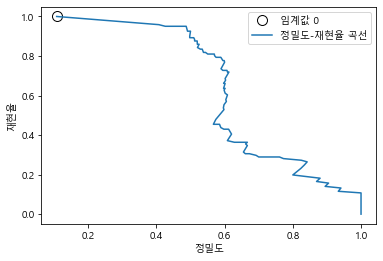

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)

print("임계값 : ", thresholds.min(),  thresholds.max())

# 0에 가까운 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))  # thresholds의 절대값이 가장 작은 것(위치)
print(close_zero)  

plt.plot(precision[close_zero], 
         recall[close_zero], 'o', 
         markersize=10,
         label="임계값 0", 
         fillstyle="none", c='k')

plt.plot(precision, recall, label="정밀도-재현율 곡선")
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
pred =  rf.predict_proba(X_test)[:, 1]
pred

array([0.  , 0.35, 0.7 , ..., 0.  , 0.  , 0.  ])

47


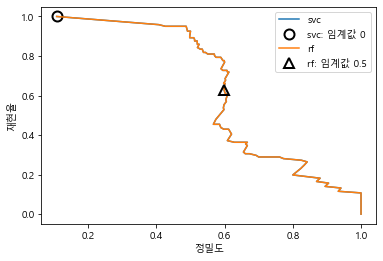

In [17]:
# SVC모델 그래프
precision, recall, thresholds = precision_recall_curve(y_test, pred)
plt.plot(precision, recall, label="svc")
# 기본 임계값(0) 위치 표시
plt.plot(precision[close_zero],
         recall[close_zero], 'o',
         markersize=10,
         label="svc: 임계값 0",
         fillstyle="none",
         c='k',
         mew=2)
# RandomForestClassifier는 decision_function 대신 predict_proba를 제공합니다.
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, pred)
# 랜덤포레스트 그래프
plt.plot(precision_rf, recall_rf, label="rf")
close_zero_rf = np.argmin(  np.abs(thresholds_rf - 0.5)  )   # 임계값이 0.5 위치
print(close_zero_rf)
# 기본 임계값(0.5) 위치 표시
plt.plot(precision_rf[close_zero_rf], recall_rf[close_zero_rf], '^', c='k',
         markersize=10, label="rf: 임계값 0.5", fillstyle="none", mew=2)
plt.xlabel("정밀도")
plt.ylabel("재현율")
plt.legend(loc="best")

In [19]:
from sklearn.metrics import f1_score
rf_f1score = f1_score(y_test, rf.predict(X_test) )
svc_f1score = f1_score(y_test, svc.predict(X_test))
print("랜덤 포레스트의 f1_score: {:.3f}".format(rf_f1score))
print("svc의 f1_score: {:.3f}".format(svc_f1score))

랜덤 포레스트의 f1_score: 0.610
svc의 f1_score: 0.656


In [20]:
from sklearn.metrics import average_precision_score
## 확률 예측
rf_pro = rf.predict_proba(X_test)[:, 1]
svc_dcfun = svc.decision_function(X_test)
ap_rf = average_precision_score(y_test, rf_pro)
ap_svc = average_precision_score(y_test, svc_dcfun)
print("랜덤 포레스트의 평균 정밀도: {:.3f}".format(ap_rf))
print("svc의 평균 정밀도: {:.3f}".format(ap_svc))

랜덤 포레스트의 평균 정밀도: 0.660
svc의 평균 정밀도: 0.666


In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

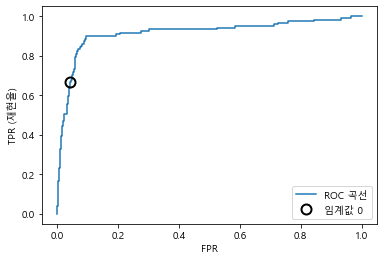

In [22]:
plt.plot(fpr, tpr, label="ROC 곡선")
plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")

# 임계값이 0 근처의 임계값을 찾습니다
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="임계값 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

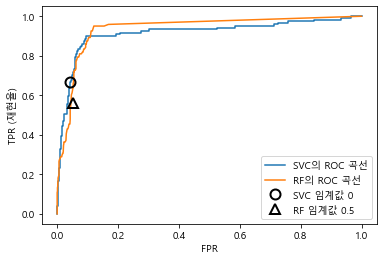

In [23]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="SVC의 ROC 곡선")
plt.plot(fpr_rf, tpr_rf, label="RF의 ROC 곡선")

plt.xlabel("FPR")
plt.ylabel("TPR (재현율)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="SVC 임계값 0", fillstyle="none", c='k', mew=2)

close_05_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_05_rf], tpr[close_05_rf], '^', markersize=10,
         label="RF 임계값 0.5", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [24]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print("랜덤 포레스트의 AUC: {:.3f}".format(rf_auc))
print("SVC의 AUC: {:.3f}".format(svc_auc))

랜덤 포레스트의 AUC: 0.937
SVC의 AUC: 0.916
